# Principal Component Analysis (PCA) Example
- http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

### 0. Generating some 3-dimensional sample data

- We created two $20×3$ datasets, $X_1$ and $X_2$ - one dataset for each class $w_1$ and $w_2$ - where $k$th row can be pictured as a 3-dimensional vector 

$$\mathbf{x_{k}} = \begin{bmatrix}
x_{k,1} & x_{k,2} & x_{k,3}
\end{bmatrix}$$
- So, our dataset will have the two forms 

$$X_1 = \begin{bmatrix}
    \mathbf{x_{1}} \\ \mathbf{x_{2}} \\ \vdots \\ \mathbf{x_{20}}    
  \end{bmatrix}=\begin{bmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} \\
    x_{2,1} & x_{2,2} & x_{2,3} \\
    \vdots \\
    x_{20,1} & x_{20,2} & x_{20,3}    
  \end{bmatrix}$$
  
$$X_2 = \begin{bmatrix}
    \mathbf{x_{21}} \\ \mathbf{x_{22}} \\ \vdots \\ \mathbf{x_{40}}    
  \end{bmatrix}=\begin{bmatrix}
    x_{21,1} & x_{21,2} & x_{21,3} \\
    x_{22,1} & x_{22,2} & x_{22,3} \\
    \vdots \\
    x_{40,1} & x_{40,2} & x_{40,3}    
  \end{bmatrix}$$  

In [2]:
import numpy as np
print("Numpy Versio: {}\n".format(np.version.version))
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

np.random.seed(2) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mean=mu_vec1, cov=cov_mat1, size=20)
print('Class1 Sample:\n', class1_sample)
assert class1_sample.shape == (20, 3)

print()

mu_vec2 = np.array([2,2,2])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mean=mu_vec2, cov=cov_mat2, size=20)
print('Class2 Samples:\n', class2_sample)
assert class2_sample.shape == (20, 3)

Numpy Versio: 1.13.3

Class1 Sample:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.292]
 [ 0.042 -1.118  0.539]
 [-0.596 -0.019  1.175]
 [-0.748  0.009 -0.878]
 [-0.156  0.257 -0.989]
 [-0.339 -0.236 -0.638]
 [-1.188 -1.421 -0.153]
 [-0.269  2.231 -2.435]
 [ 0.113  0.370  1.360]
 [ 0.502 -0.844  0.000]
 [ 0.542 -0.314  0.771]
 [-1.868  1.731  1.468]
 [-0.336  0.611  0.048]
 [-0.829  0.088  1.000]
 [-0.381 -0.376 -0.074]
 [ 0.433  1.278 -0.635]
 [ 0.508  0.216 -1.859]]

Class2 Samples:
 [[ 1.581  1.868  1.960]
 [ 2.326 -0.040  2.046]
 [ 1.322  0.561  2.524]
 [ 2.735  1.347  2.842]
 [ 1.618  2.066  0.901]
 [ 3.584 -0.659  1.909]
 [ 2.695 -0.033  1.811]
 [ 1.923  2.825  3.248]
 [ 1.596  0.615  3.367]
 [ 3.218  1.538  2.351]
 [ 2.382  2.566  2.204]
 [ 3.407  0.262  3.041]
 [ 2.380  1.783  3.174]
 [-0.344  3.162  2.386]
 [ 0.867  2.433  1.696]
 [ 4.585  3.835  2.441]
 [ 1.281  1.417  1.675]
 [ 1.440  1.098  1.409]
 [ 1.724  1.483  1.301]
 [ 1.07

- Just to get a rough idea how the samples of our two classes $w_1$ and $w_2$ are distributed, let us plot them in a 3D scatter plot.

Populating the interactive namespace from numpy and matplotlib


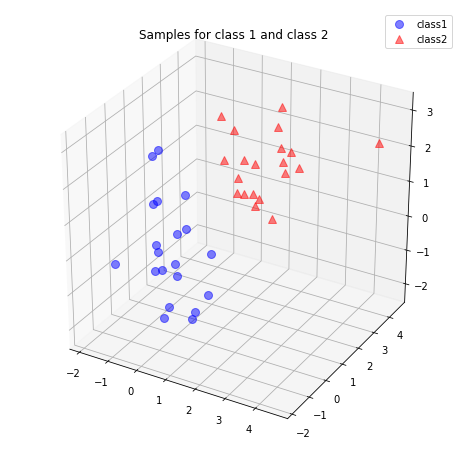

In [4]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:, 0], class1_sample[:, 1], class1_sample[:, 2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:, 0], class2_sample[:, 1], class2_sample[:, 2], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## 1. Implement step-by-step PCA manually (6 step)

### 1) Take the whole dataset consisting of $𝑑$-dimensional samples ignoring the class labels
- So, our dataset will finally have the following form 
$$X = 
\begin{bmatrix}
    \mathbf{X_{1}} \\ \mathbf{X_{2}}    
  \end{bmatrix}
=  
\begin{bmatrix}
    \mathbf{x_{1}} \\ \mathbf{x_{2}} \\ \vdots \\ \mathbf{x_{40}}    
  \end{bmatrix}
=\begin{bmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} \\
    x_{2,1} & x_{2,2} & x_{2,3} \\
    \vdots \\
    x_{40,1} & x_{40,2} & x_{40,3}    
  \end{bmatrix}$$

In [6]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=0)
assert all_samples.shape == (40, 3)
print('All Samples:\n', all_samples)

All Samples:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.292]
 [ 0.042 -1.118  0.539]
 [-0.596 -0.019  1.175]
 [-0.748  0.009 -0.878]
 [-0.156  0.257 -0.989]
 [-0.339 -0.236 -0.638]
 [-1.188 -1.421 -0.153]
 [-0.269  2.231 -2.435]
 [ 0.113  0.370  1.360]
 [ 0.502 -0.844  0.000]
 [ 0.542 -0.314  0.771]
 [-1.868  1.731  1.468]
 [-0.336  0.611  0.048]
 [-0.829  0.088  1.000]
 [-0.381 -0.376 -0.074]
 [ 0.433  1.278 -0.635]
 [ 0.508  0.216 -1.859]
 [ 1.581  1.868  1.960]
 [ 2.326 -0.040  2.046]
 [ 1.322  0.561  2.524]
 [ 2.735  1.347  2.842]
 [ 1.618  2.066  0.901]
 [ 3.584 -0.659  1.909]
 [ 2.695 -0.033  1.811]
 [ 1.923  2.825  3.248]
 [ 1.596  0.615  3.367]
 [ 3.218  1.538  2.351]
 [ 2.382  2.566  2.204]
 [ 3.407  0.262  3.041]
 [ 2.380  1.783  3.174]
 [-0.344  3.162  2.386]
 [ 0.867  2.433  1.696]
 [ 4.585  3.835  2.441]
 [ 1.281  1.417  1.675]
 [ 1.440  1.098  1.409]
 [ 1.724  1.483  1.301]
 [ 1.071  4.550  0.527]]


### 2) Compute the $𝑑$-dimensional zero-mean vector

In [10]:
print("all_samples[:, 0]\n", all_samples[:, 1], end="\n\n")
print("all_samples[:, 1]\n", all_samples[:, 1], end="\n\n")
print("all_samples[:, 2]\n", all_samples[:, 2], end="\n\n")

mean_x = np.mean(all_samples[:, 0])
mean_y = np.mean(all_samples[:, 1])
mean_z = np.mean(all_samples[:, 2])

mean_vector = np.array([[mean_x, mean_y, mean_z]])
assert mean_vector.shape == (1, 3)

print('Mean Vector:\n', mean_vector)

all_samples[:, 0]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
  2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
  1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
  2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]

all_samples[:, 1]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
  2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
  1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
  2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]

all_samples[:, 2]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
 -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859
  1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
  2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]

Mean Vector:
 [[ 0.941  0.815  0.994]]


### 3) Compute the covariance matrix of the whole data set

- The covariance matrix is computed by the following equation:
$$
S = {1 \over {40-1}} \cdot \sum\limits_{k=1}^{40} (\pmb x_k - \pmb m)^T\;(\pmb x_k - \pmb m)
$$
where $m$ is the mean vector

In [13]:
cov_matrix = np.zeros((3, 3))

for i in range(all_samples.shape[0]):
    assert all_samples[i, :].shape == (3,)
    cov_matrix += (all_samples[i, :].reshape(1, 3) - mean_vector).T.dot((all_samples[i, :].reshape(1, 3) - mean_vector))

cov_matrix = cov_matrix / (40 - 1)

print('Covariance Matrix:\n', cov_matrix)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


- we can also use in-built **numpy.cov()** function

In [25]:
assert all_samples.shape == (40, 3)
cov_mat = np.cov(all_samples.T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


### 4) Compute eigenvectors and corresponding eigenvalues  for the matrix

In [30]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print('{} \n\n {}'.format(eig_val_cov, eig_vec_cov))
print()
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3)
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print(40 * '-')

[ 4.112  1.000  1.573] 

 [[-0.588 -0.667  0.458]
 [-0.452 -0.199 -0.870]
 [-0.671  0.718  0.184]]

Eigenvalue 1: 4.112349421674584
Eigenvector 1: 
[[-0.588 -0.452 -0.671]]
----------------------------------------
Eigenvalue 2: 1.0003892833440393
Eigenvector 2: 
[[-0.667 -0.199  0.718]]
----------------------------------------
Eigenvalue 3: 1.5729106449928036
Eigenvector 3: 
[[ 0.458 -0.870  0.184]]
----------------------------------------


- Checking the eigenvector-eigenvalue calculation
$$ S \pmb{v} = \lambda\pmb{v}$$
where
$$S = Covariance \; matrix\\
\pmb{v} = \; Eigenvector\\
\lambda = \; Eigenvalue$$

- the eigenvectors have all the same unit length 1

In [38]:
for v1 in eig_vec_cov.T:
    for v2 in eig_vec_cov.T:
        print(v1.dot(v2), end=", ")
    print()

print()

for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:, i]
    np.testing.assert_array_almost_equal(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv)
    print('{} \n:\n {}'.format(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv))
    print('Uint length Check: {}'.format(np.linalg.norm(eigv)))
    print()

1.0, -2.77555756156e-16, 2.35922392733e-16, 
-2.77555756156e-16, 1.0, -3.05311331772e-16, 
2.35922392733e-16, -3.05311331772e-16, 1.0, 

[-2.418 -1.857 -2.760] 
:
 [-2.418 -1.857 -2.760]
Uint length Check: 1.0

[-0.667 -0.199  0.718] 
:
 [-0.667 -0.199  0.718]
Uint length Check: 0.9999999999999999

[ 0.720 -1.368  0.290] 
:
 [ 0.720 -1.368  0.290]
Uint length Check: 1.0



- Visualizing the eigenvectors

[-0.588 -0.452 -0.671]
[-0.667 -0.199  0.718]
[ 0.458 -0.870  0.184]


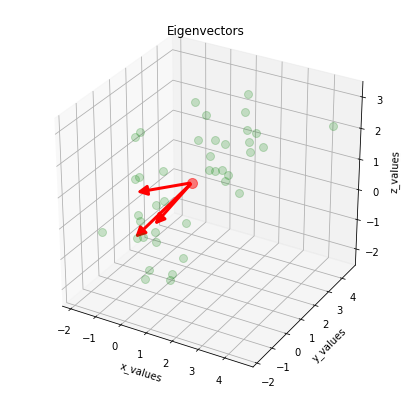

In [32]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[:, 0], all_samples[:, 1], all_samples[:, 2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

for v in eig_vec_cov.T:
    print(v)
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

    ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

- the above eigenvectors will form the axes of the new feature subspace.

### 5) Sorting the eigenvectors by decreasing eigenvalues and choose $𝑘$ eigenvectors with the largest eigenvalues to form a $𝑑×𝑘$ dimensional matrix $P$

- Sorting the eigenvectors by decreasing eigenvalues

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0], i[1])

4.11234942167 [-0.588 -0.452 -0.671]
1.57291064499 [ 0.458 -0.870  0.184]
1.00038928334 [-0.667 -0.199  0.718]


- Choosing $k$ eigenvectors with the largest eigenvalues
  - $k=2$: we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace
  - We combine the 2 eigenvectors to construct our $d×k$-dimensional (i.e., $3×2$-dimensional) eigenvector matrix $P$.

In [42]:
matrix_p = np.array((eig_pairs[0][1], eig_pairs[1][1])).T
print('Matrix P:\n', matrix_p)

Matrix P:
 [[-0.588  0.458]
 [-0.452 -0.870]
 [-0.671  0.184]]


### 6) Use this $P$ matrix to transform the samples onto the new subspace
- we use the $3×2$-dimensional matrix $P$ that we just computed to transform our samples onto the new subspace via the equation $y=x × P$.

In [43]:
transformed = np.matmul(all_samples, matrix_p)
assert transformed.shape == (40,2)

- Visualize the transformed $40×𝑘$-dimensional (i.e., $40×2$-dimensional) samples in the new subspace.

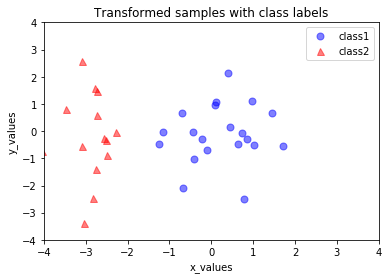

In [56]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## 2. Using the PCA class from the sklearn.decomposition library to confirm our results
- [Reference] http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

$$\mathbf{x_{k}} = \begin{bmatrix}
x_{k,1} & x_{k,2} & x_{k,3}
\end{bmatrix}$$
- So, our dataset will have the two forms 

$$X_1 = \begin{bmatrix}
    \mathbf{x_{1}} \\ \mathbf{x_{2}} \\ \vdots \\ \mathbf{x_{20}}    
  \end{bmatrix}=\begin{bmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} \\
    x_{2,1} & x_{2,2} & x_{2,3} \\
    \vdots \\
    x_{20,1} & x_{20,2} & x_{20,3}    
  \end{bmatrix}$$
  
$$X_2 = \begin{bmatrix}
    \mathbf{x_{21}} \\ \mathbf{x_{22}} \\ \vdots \\ \mathbf{x_{40}}    
  \end{bmatrix}=\begin{bmatrix}
    x_{21,1} & x_{21,2} & x_{21,3} \\
    x_{22,1} & x_{22,2} & x_{22,3} \\
    \vdots \\
    x_{40,1} & x_{40,2} & x_{40,3}    
  \end{bmatrix}$$  

In [45]:
print('All Samples:\n', all_samples)

All Samples:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.292]
 [ 0.042 -1.118  0.539]
 [-0.596 -0.019  1.175]
 [-0.748  0.009 -0.878]
 [-0.156  0.257 -0.989]
 [-0.339 -0.236 -0.638]
 [-1.188 -1.421 -0.153]
 [-0.269  2.231 -2.435]
 [ 0.113  0.370  1.360]
 [ 0.502 -0.844  0.000]
 [ 0.542 -0.314  0.771]
 [-1.868  1.731  1.468]
 [-0.336  0.611  0.048]
 [-0.829  0.088  1.000]
 [-0.381 -0.376 -0.074]
 [ 0.433  1.278 -0.635]
 [ 0.508  0.216 -1.859]
 [ 1.581  1.868  1.960]
 [ 2.326 -0.040  2.046]
 [ 1.322  0.561  2.524]
 [ 2.735  1.347  2.842]
 [ 1.618  2.066  0.901]
 [ 3.584 -0.659  1.909]
 [ 2.695 -0.033  1.811]
 [ 1.923  2.825  3.248]
 [ 1.596  0.615  3.367]
 [ 3.218  1.538  2.351]
 [ 2.382  2.566  2.204]
 [ 3.407  0.262  3.041]
 [ 2.380  1.783  3.174]
 [-0.344  3.162  2.386]
 [ 0.867  2.433  1.696]
 [ 4.585  3.835  2.441]
 [ 1.281  1.417  1.675]
 [ 1.440  1.098  1.409]
 [ 1.724  1.483  1.301]
 [ 1.071  4.550  0.527]]


- When using the PCA class, we can directly specify to how many components we want to reduce our input dataset via the **n_components** parameter.
  - n_components: int, None or string - Number of components to keep
<br/>
<br/>
  
- Next, we just need to use the **.fit_transform()** in order to perform the dimensionality reduction.

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transf = pca.fit_transform(all_samples)
print(pca.explained_variance_ratio_)

[ 0.615  0.235]


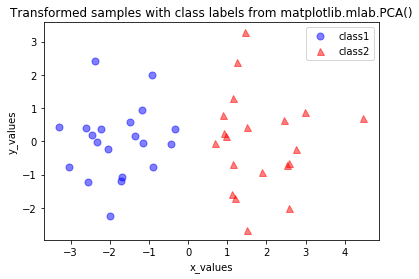

In [54]:
plt.plot(transf[0:20, 0], transf[0:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf[20:40, 0], transf[20:40, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
# plt.xlim([-4,4])
# plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

- The plot above seems to be the mirror image of the plot from our step by step approach. 
- This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by $×(−1)$ to revert the mirror image

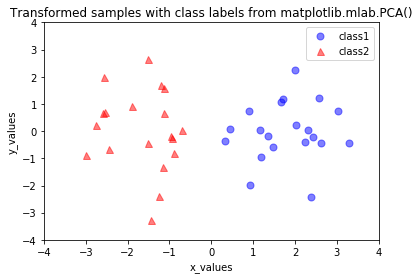

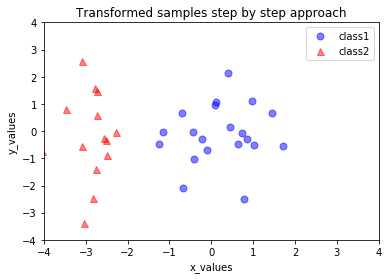

In [60]:
# sklearn.decomposition.PCA
transf = transf * (-1)

plt.plot(transf[0:20, 0], transf[0:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf[20:40, 0], transf[20:40, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# step by step PCA
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')

plt.show()

- Looking at the 2 plots above, the distributions along the component axes look identical, only the center of the data is slightly different. 
- If we want to make the results produced by the step-by-step approach equal to the ones produced by the scikit-learn’s PCA class, just subtract the mean vectors from the samples X to center the data at the coordinate system’s origin

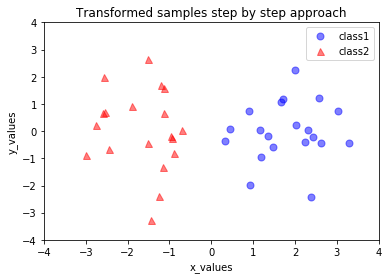

In [65]:
mean_x = np.mean(all_samples[:, 0])
mean_y = np.mean(all_samples[:, 1])
mean_z = np.mean(all_samples[:, 2])

mean_vector = np.array([[mean_x, mean_y , mean_z]])
assert mean_vector.shape == (1, 3)

transformed = np.matmul(all_samples - mean_vector, matrix_p)

# step by step PCA
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')

plt.show()